In [1]:
import requests
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
url = 'https://api.hh.ru/vacancies'
r = requests.get(url, params={'text': 'junior data', 'per_page': 100, 'page': 0})

In [3]:
n_pages = json.loads(r.text)['pages']

In [4]:
ids = []
for page in range(n_pages): 
    req = requests.get(url, params={'text': 'junior data', 'per_page': 100, 'page':page})
    items = json.loads(req.text)['items']
    for vacancy in items: 
        ids.append(vacancy['id'])
        

In [5]:
key_skills = []
for id_i in ids: 
    req_vacancy = requests.get(url + '/' + id_i)
    items = json.loads(req_vacancy.text)
    key_skills.append([x['name'] for x in items['key_skills'] if x])

In [6]:
key_skills_words = [word.replace(' ', '_') for l in key_skills for word  in l]

In [7]:
pd.value_counts(key_skills_words)[:100].index

Index(['SQL', 'Python', 'Английский_язык', 'Linux', 'Java', 'Git',
       'Google_Analytics', 'MS_PowerPoint', 'PostgreSQL', 'Анализ_данных',
       'JavaScript', 'Яндекс.Метрика', 'C++', 'Разработка_технических_заданий',
       'Data_Analysis', 'Математическая_статистика', 'MS_SQL', 'MS_Excel',
       'Project_management', 'ООП', 'Работа_с_базами_данных', 'C#',
       'Spring_Framework', 'Data_Mining', 'Market_Research', 'Amplitude',
       'Big_Data', 'HTML', 'Business_English', 'Analytical_skills', 'MySQL',
       'SCALA', 'ORACLE', 'CSS', 'Atlassian_Jira', 'AWS', 'Bash',
       'Работа_в_команде', 'Управление_проектами', 'Базы_данных', 'MS_Outlook',
       'Node.js', 'Financial_Analysis', 'Интернет-реклама',
       'Presentation_skills', 'Статистический_анализ',
       '1С:_Управление_Торговлей', 'MS_Access', 'Organization_Skills',
       'ERP-системы_на_базе_1С', 'Бизнес-анализ', 'ETL', 'Google_AdWords',
       'Обучение_и_развитие', 'GCP', 'MongoDB', 'Java_SE', 'Objective-C', '1С

In [8]:
text = ' '.join(key_skills_words)

In [9]:
wc = WordCloud(width=3000, height=2000, max_words=100).generate(text)

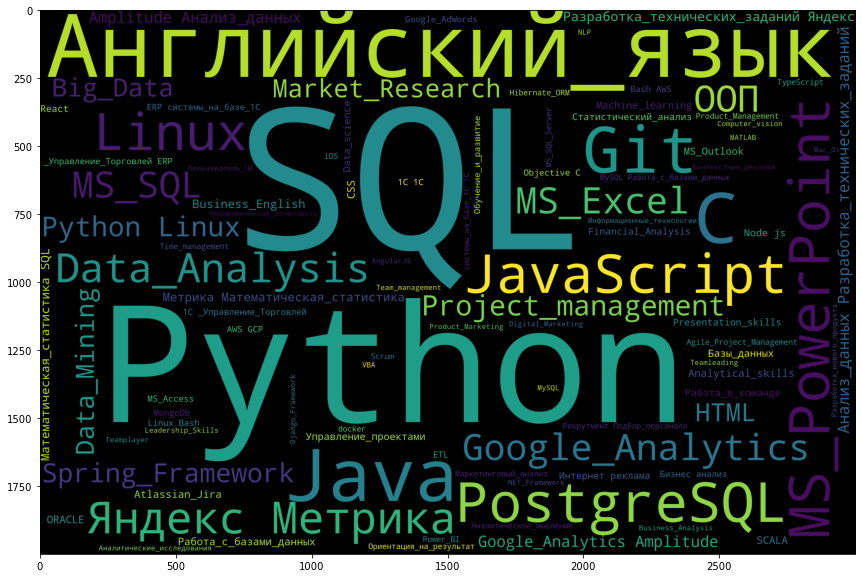

In [11]:
plt.figure(figsize=(16, 10))
plt.imshow(wc)
plt.savefig('cloud_of_words.svg', format='svg')